## Dual Governance Agent-based modelling



In [11]:
%pip show radcad

Name: radcad
Version: 0.13.0
Summary: A Python package for dynamical systems modelling & simulation, inspired by and compatible with cadCAD
Home-page: 
Author: CADLabs
Author-email: benschza@users.noreply.github.com
License: 
Location: /opt/anaconda3/envs/my-conda-env/lib/python3.12/site-packages
Requires: fn-py, numpy, pandas, pathos, py
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Dependences
import pandas as pd
import numpy as np

# radCAD
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

# Experiments
from model import run
from model.parts.utils import *

pd.options.display.float_format = "{:.2f}".format

%matplotlib inline

In [13]:
from model.state_variables import initial_state
from model.state_update_blocks import state_update_blocks
from model.sys_params import sys_params

MONTE_CARLO_RUNS = 1
TIMESTEPS = 1000

model = Model(
    initial_state=initial_state,
    params=sys_params,
    state_update_blocks=state_update_blocks,
)
simulation = Simulation(model=model, timesteps=TIMESTEPS, runs=MONTE_CARLO_RUNS)

result = simulation.run()
df = pd.DataFrame(result)
rdf = run.postprocessing(df)

[]


In [14]:
df.head()

,agents,dg,proposals,time_manager,simulation,subset,run,substep,timestep
0,{a25ef09e-a332-4b7e-bd8b-0bb78c22f9a9: {'st_am...,DualGovernanceState(config=DualGovernanceConfi...,{},TimeManager(current_time=datetime.datetime(202...,0,0,1,0,0
1,{a25ef09e-a332-4b7e-bd8b-0bb78c22f9a9: {'st_am...,DualGovernanceState(config=DualGovernanceConfi...,{},TimeManager(current_time=datetime.datetime(202...,0,0,1,1,1
2,{a25ef09e-a332-4b7e-bd8b-0bb78c22f9a9: {'st_am...,DualGovernanceState(config=DualGovernanceConfi...,{},TimeManager(current_time=datetime.datetime(202...,0,0,1,2,1
3,{a25ef09e-a332-4b7e-bd8b-0bb78c22f9a9: {'st_am...,DualGovernanceState(config=DualGovernanceConfi...,{},TimeManager(current_time=datetime.datetime(202...,0,0,1,3,1
4,{a25ef09e-a332-4b7e-bd8b-0bb78c22f9a9: {'st_am...,DualGovernanceState(config=DualGovernanceConfi...,{},TimeManager(current_time=datetime.datetime(202...,0,0,1,4,1


In [15]:
rdf.head()

,timestep,run,proposals_count,st_at_agents,dg_state,current_time,dg_current_time,rqs
4,1,1,0,702342311270982648594432.00,1,2024-07-25 14:16:01.969318,2024-07-25 16:16:01.969318,0
8,2,1,0,702342311270982648594432.00,1,2024-07-25 15:16:01.969318,2024-07-25 19:16:01.969318,0
12,3,1,0,702342311270982648594432.00,1,2024-07-25 16:16:01.969318,2024-07-25 22:16:01.969318,0
16,4,1,0,702342311270982648594432.00,1,2024-07-25 17:16:01.969318,2024-07-26 01:16:01.969318,0
20,5,1,0,702342311270982648594432.00,1,2024-07-25 18:16:01.969318,2024-07-26 04:16:01.969318,0


/Users/sergey_solo/lido/dg-research/model/parts/utils.py:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df_copy.groupby(aggregate_dimension).mean().reset_index()
/Users/sergey_solo/lido/dg-research/model/parts/utils.py:54: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_df = df_copy.groupby(aggregate_dimension).median().reset_index()
/Users/sergey_solo/lido/dg-research/model/parts/utils.py:55: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

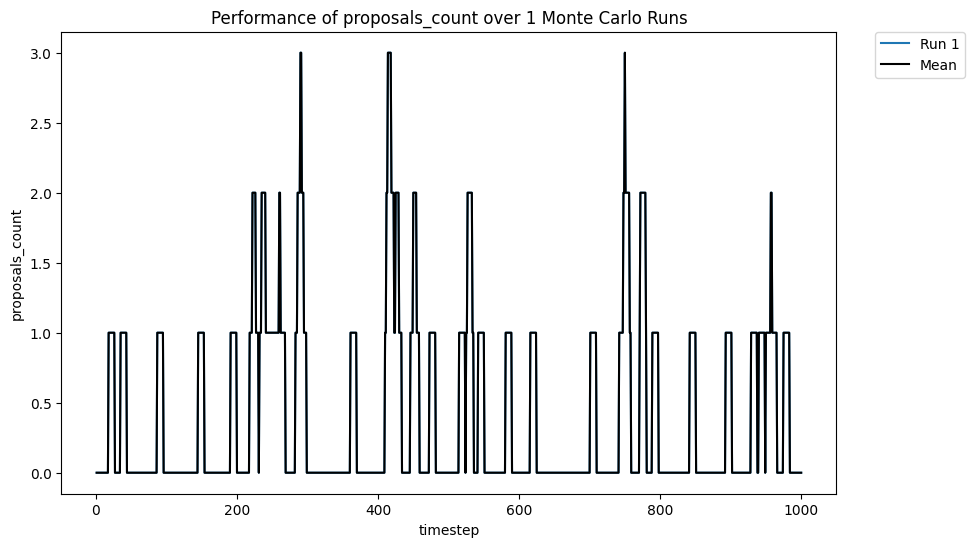

In [16]:
monte_carlo_plot(rdf, "timestep", "timestep", "proposals_count", 1)

/Users/sergey_solo/lido/dg-research/model/parts/utils.py:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df_copy.groupby(aggregate_dimension).mean().reset_index()
/Users/sergey_solo/lido/dg-research/model/parts/utils.py:54: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_df = df_copy.groupby(aggregate_dimension).median().reset_index()
/Users/sergey_solo/lido/dg-research/model/parts/utils.py:55: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

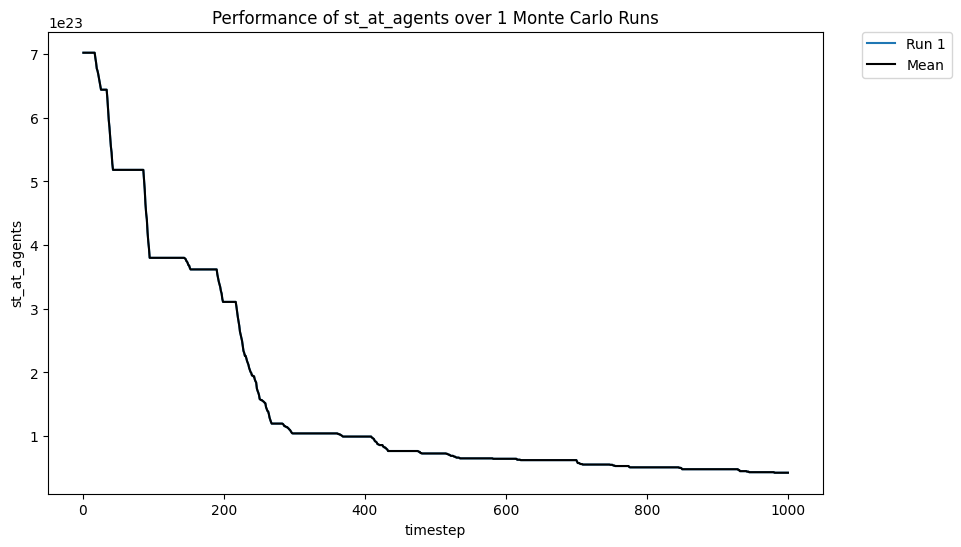

In [17]:
monte_carlo_plot(rdf, "timestep", "timestep", "st_at_agents", 1)

/Users/sergey_solo/lido/dg-research/model/parts/utils.py:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df_copy.groupby(aggregate_dimension).mean().reset_index()
/Users/sergey_solo/lido/dg-research/model/parts/utils.py:54: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_df = df_copy.groupby(aggregate_dimension).median().reset_index()
/Users/sergey_solo/lido/dg-research/model/parts/utils.py:55: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

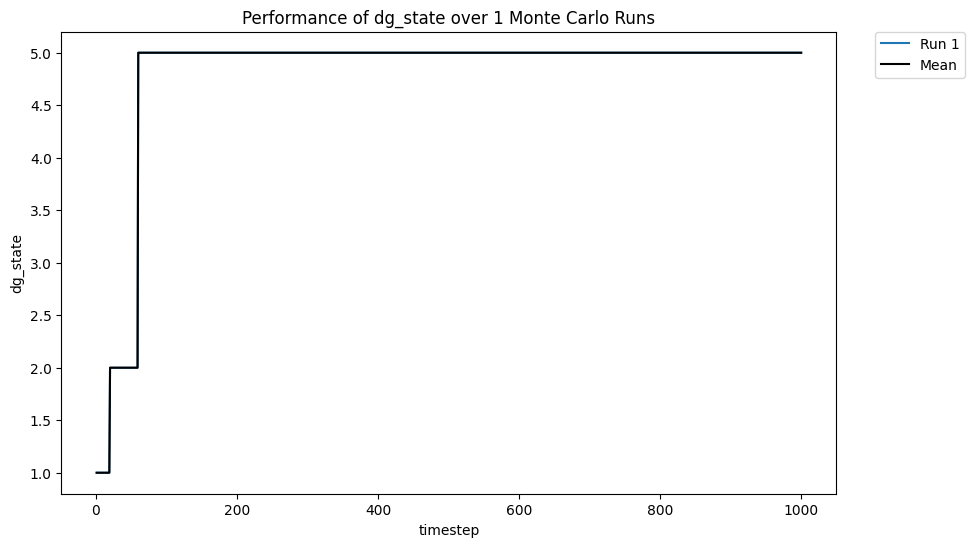

In [18]:
monte_carlo_plot(rdf, "timestep", "timestep", "dg_state", 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


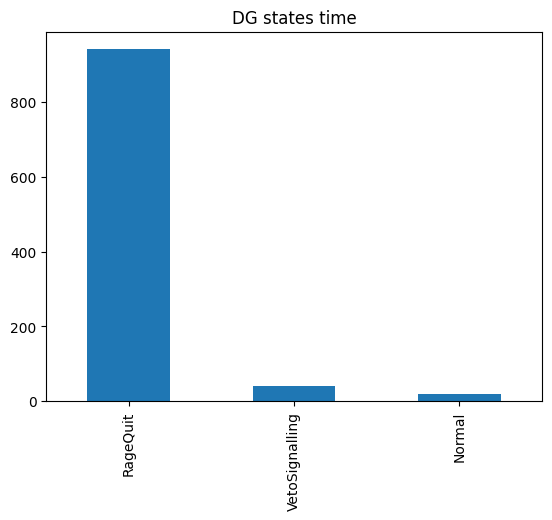

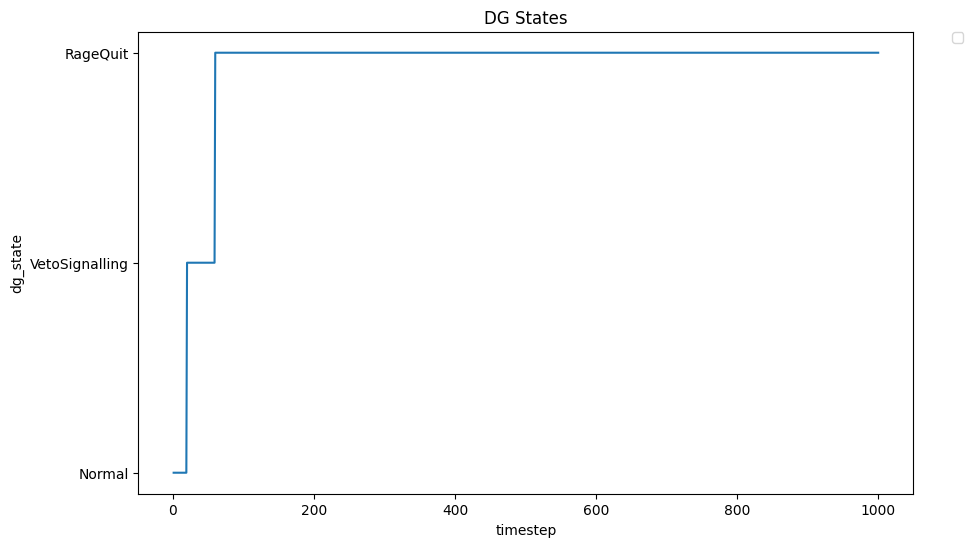

In [19]:
state_plot(rdf, "timestep", "dg_state", 1)

/Users/sergey_solo/lido/dg-research/model/parts/utils.py:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df_copy.groupby(aggregate_dimension).mean().reset_index()
/Users/sergey_solo/lido/dg-research/model/parts/utils.py:54: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_df = df_copy.groupby(aggregate_dimension).median().reset_index()
/Users/sergey_solo/lido/dg-research/model/parts/utils.py:55: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

KeyError: 'dg_current_time'

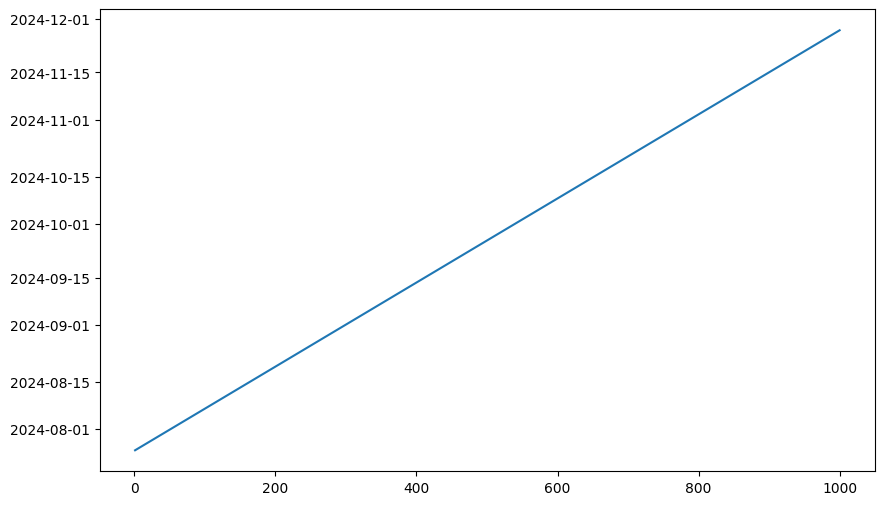

In [20]:
monte_carlo_plot(rdf, "timestep", "timestep", "dg_current_time", 1)

/Users/sergey_solo/lido/dg-research/model/parts/utils.py:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df_copy.groupby(aggregate_dimension).mean().reset_index()
/Users/sergey_solo/lido/dg-research/model/parts/utils.py:54: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_df = df_copy.groupby(aggregate_dimension).median().reset_index()
/Users/sergey_solo/lido/dg-research/model/parts/utils.py:55: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns w

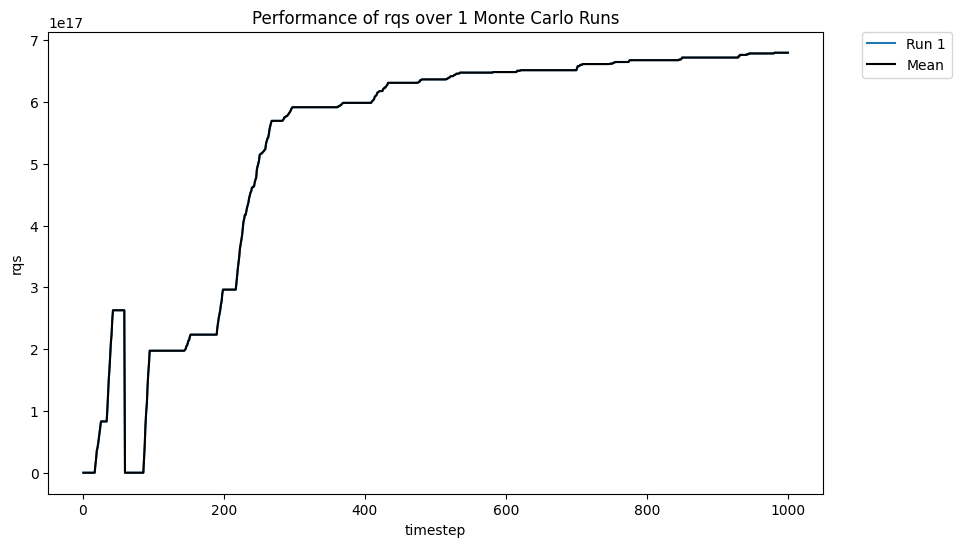

In [21]:
monte_carlo_plot(rdf, "timestep", "timestep", "rqs", 1)